In [1]:
FACTOR = 0.5 # prueben también FACTOR=0.0 y FACTOR=10

import numpy as np

#np.random.seed(42)

N = 100  # Number of observations
x1 = np.random.normal(0, 1, N)
x2 = FACTOR*x1 + np.random.normal(0, 1, N)  # x2 is highly correlated with x1

true_beta_0 = 1
true_beta_1 = 2
true_beta_2 = -1
epsilon = np.random.normal(0, 1, N)
Y = true_beta_0 + true_beta_1 * x1 + true_beta_2 * x2 + epsilon

X = np.column_stack((np.ones(N), x1, x2))

beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

residuals = Y - X @ beta_hat
sigma_squared_hat = np.sum(residuals**2) / (N - X.shape[1])

var_cov_matrix_beta = sigma_squared_hat * np.linalg.inv(X.T @ X)

print("Estimated regression coefficients (beta_hat):", beta_hat)
print("Variance-Covariance Matrix of beta_hat:")
print(var_cov_matrix_beta)

Estimated regression coefficients (beta_hat): [ 1.07851221  1.89296701 -1.07484247]
Variance-Covariance Matrix of beta_hat:
[[ 0.01240814 -0.00141094  0.00187258]
 [-0.00141094  0.01514365 -0.00697618]
 [ 0.00187258 -0.00697618  0.0133528 ]]


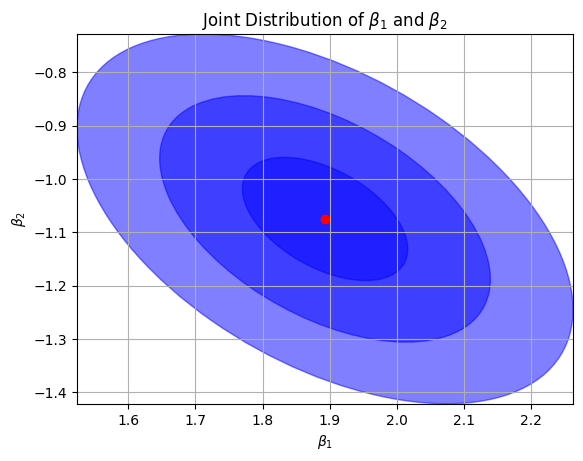

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_covariance_ellipse(mu, cov, color, levels=[1, 2, 3]):
    """
    Plots multiple covariance ellipses for given confidence levels.
    
    :param mu: Mean vector of the distribution
    :param cov: Covariance matrix of the distribution
    :param colors: List of colors for each ellipse
    :param levels: Confidence levels for the ellipses (in sigma)
    """
    # Eigenvalue decomposition
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))

    ellipses = []
    for level in levels:
        width, height = 2 * level * np.sqrt(vals)  # level-sigma ellipse
        ellipse = Ellipse(xy=mu, width=width, height=height, angle=theta, color=color, alpha=0.5, label=f'{level}-sigma')
        ellipses.append(ellipse)
    
    return ellipses

# Assuming var_cov_matrix_beta is the variance-covariance matrix of beta_hat
mu = beta_hat[1:3]  # Mean vector for beta_1 and beta_2
cov = var_cov_matrix_beta[1:3, 1:3]  # Covariance matrix for beta_1 and beta_2

# Plotting
fig, ax = plt.subplots()
ellipse = plot_covariance_ellipse(mu, cov, 'blue')
[ax.add_patch(_)  for _ in ellipse];
ax.scatter(mu[0], mu[1], color='red')  # Mean of beta_1 and beta_2
ax.set_xlim(mu[0] - 3*np.sqrt(cov[0, 0]), mu[0] + 3*np.sqrt(cov[0, 0]))
ax.set_ylim(mu[1] - 3*np.sqrt(cov[1, 1]), mu[1] + 3*np.sqrt(cov[1, 1]))
ax.set_xlabel('$\\beta_1$')
ax.set_ylabel('$\\beta_2$')
ax.set_title('Joint Distribution of $\\beta_1$ and $\\beta_2$')
plt.grid(True)
plt.show()


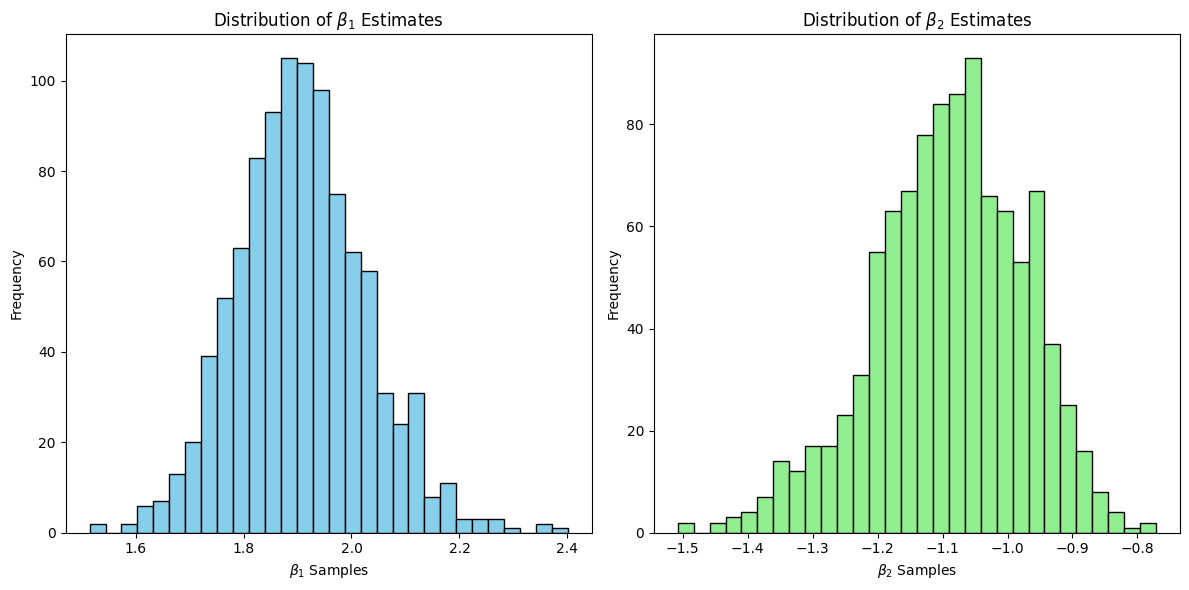

In [3]:
def simulate_and_fit(X, Y):
    # Simulate bootstrap samples
    indices = np.random.choice(range(N), size=N, replace=True)
    X_sampled = X[indices]
    Y_sampled = Y[indices]
    
    # Fit model to the sampled data
    beta_hat_sampled = np.linalg.inv(X_sampled.T @ X_sampled) @ X_sampled.T @ Y_sampled
    return beta_hat_sampled[1], beta_hat_sampled[2]  # Return b1 and b2

# Monte Carlo simulation
num_simulations = 1000
beta_1_samples, beta_2_samples = zip(*[simulate_and_fit(X, Y) for _ in range(num_simulations)])

# Plotting the distributions of beta_1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(beta_1_samples, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('$\\beta_1$ Samples')
plt.ylabel('Frequency')
plt.title('Distribution of $\\beta_1$ Estimates')

# Plotting the distributions of beta_0
plt.subplot(1, 2, 2)
plt.hist(beta_2_samples, bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('$\\beta_2$ Samples')
plt.ylabel('Frequency')
plt.title('Distribution of $\\beta_2$ Estimates')

plt.tight_layout()
plt.show()


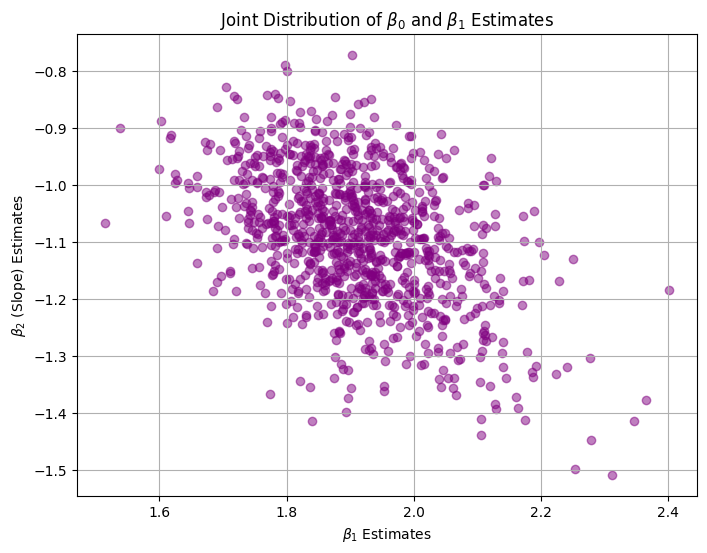

In [4]:
import matplotlib.pyplot as plt

# Scatter plot for the joint distribution of beta_0 and beta_1
plt.figure(figsize=(8, 6))
plt.scatter(beta_1_samples, beta_2_samples, alpha=0.5, color='purple')
plt.xlabel('$\\beta_1$ Estimates')
plt.ylabel('$\\beta_2$ (Slope) Estimates')
plt.title('Joint Distribution of $\\beta_0$ and $\\beta_1$ Estimates')
plt.grid(True)
plt.show()